<a href="https://colab.research.google.com/github/sharon8y/SquareTracking/blob/main/HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

working with Keras library, create a deep learning machine for conversion of temperature from C to F. Then, Build a dataset, feature is degress in celsius, response is degress in Farenheit, make 10 samples.

now, please calculate the error using ‘mean squared error’ and learning rate 0.01 and using the optimization algo ADAM. now create the fit function that will train the model, please write a training that has  500 epochs and batch size = 1. please make a prediction by taking  a Celsius that's not in the dataset, and pass it through the model.


In [5]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Function to convert Celsius to Fahrenheit
def celsius_to_fahrenheit(c):
    return c * 9/5 + 32

# Function to create and train the model
def train_model(X, y, epochs=1000, learning_rate=0.01):
    # Creating a simple neural network model using Keras
    model = Sequential()
    model.add(Dense(1, input_shape=(1,)))  # Single neuron for a simple linear model

    # Compiling the model with Mean Squared Error loss and Adam optimizer with learning rate
    opt = Adam(learning_rate=learning_rate)
    model.compile(optimizer=opt, loss='mean_squared_error')

    # Training the model
    model.fit(X, y, epochs=epochs, verbose=0)  # Training for specified number of epochs

    return model

# Generating 10 random Celsius temperatures
celsius_degrees = np.random.randint(-100, 100, 10)

# Converting Celsius temperatures to Fahrenheit
fahrenheit_degrees = [celsius_to_fahrenheit(c) for c in celsius_degrees]

# Creating the dataset
data = np.array(list(zip(celsius_degrees, fahrenheit_degrees)))

# Splitting features and labels
X = data[:, 0]  # Celsius temperatures
y = data[:, 1]  # Corresponding Fahrenheit temperatures

# Training the model using the train_model function
trained_model = train_model(X, y, epochs=1000, learning_rate=0.01)

# Predicting Fahrenheit temperatures for new Celsius values
celsius_test = np.array([50, 60, 70])  # Example test Celsius temperatures
fahrenheit_predictions = trained_model.predict(celsius_test)

# Displaying the predictions
for i in range(len(celsius_test)):
    print(f"{celsius_test[i]} degrees Celsius = {fahrenheit_predictions[i][0]} degrees Fahrenheit")

# Evaluating the model using Mean Squared Error on the training data
mse = trained_model.evaluate(X, y)
print(f"Mean Squared Error (MSE) on the training data: {mse}")


1/1 [==============================] - 0s 70ms/step
50 degrees Celsius = 99.33646392822266 degrees Fahrenheit
60 degrees Celsius = 117.34957122802734 degrees Fahrenheit
70 degrees Celsius = 135.3626708984375 degrees Fahrenheit
1/1 [==============================] - 0s 145ms/step - loss: 516.6033
Mean Squared Error (MSE) on the training data: 516.6033325195312


In [14]:
#please make a prediction by taking  a Celsius that's not in the dataset, and pass it through the model. Write ONLY the code for the prediction, to be added in another slot in google colab

In [15]:
# Assuming 'trained_model' is the trained model from the previous code

# Celsius temperature not in the dataset
new_celsius_temp = 80

# Reshape the input to match the model's input shape (1,)
new_celsius_temp = np.array(new_celsius_temp).reshape(-1, 1)

# Predicting Fahrenheit temperature for the new Celsius value using the trained model
predicted_fahrenheit = trained_model.predict(new_celsius_temp)

# Displaying the prediction
print(f"{new_celsius_temp[0][0]} degrees Celsius = {predicted_fahrenheit[0][0]} degrees Fahrenheit")


1/1 [==============================] - 0s 49ms/step
80 degrees Celsius = 173.61878967285156 degrees Fahrenheit


Show me the weights of the model: w0, w1, bias

In [17]:
# Getting the weights of the trained model
weights = trained_model.get_weights()

# Extracting the weights w0, w1, and the bias term
w0 = weights[0][0]  # Weight of the neuron
bias = weights[1][0]  # Bias term

print(f"w0 (Weight): {w0}")
print(f"bias: {bias}")


w0 (Weight): [1.8474244]
bias: 25.82484245300293


could you create another code to modify the current model so it gets closer to the celsius to farenhait conversion equation?

In [18]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Function to convert Celsius to Fahrenheit
def celsius_to_fahrenheit(c):
    return c * 9/5 + 32

# Function to create and train the improved model
def improve_model(X, y, epochs=1000, learning_rate=0.01, batch_size=1):
    # Creating a more complex neural network model using Keras
    model = Sequential()
    model.add(Dense(64, input_shape=(1,), activation='relu'))  # Adding a hidden layer with 64 neurons and ReLU activation
    model.add(Dense(32, activation='relu'))  # Another hidden layer with 32 neurons and ReLU activation
    model.add(Dense(1))  # Output layer with 1 neuron (for regression tasks)

    # Compiling the model with Mean Squared Error loss and Adam optimizer with learning rate
    opt = Adam(learning_rate=learning_rate)
    model.compile(optimizer=opt, loss='mean_squared_error')

    # Training the model with specified epochs and batch size
    model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=0)

    return model

# Generating 10 random Celsius temperatures
celsius_degrees = np.random.randint(-100, 100, 10)

# Converting Celsius temperatures to Fahrenheit
fahrenheit_degrees = [celsius_to_fahrenheit(c) for c in celsius_degrees]

# Creating the dataset
data = np.array(list(zip(celsius_degrees, fahrenheit_degrees)))

# Splitting features and labels
X = data[:, 0]  # Celsius temperatures
y = data[:, 1]  # Corresponding Fahrenheit temperatures

# Training the improved model using the improve_model function with 500 epochs and batch size = 1
improved_model = improve_model(X, y, epochs=500, learning_rate=0.01, batch_size=1)

# Predicting Fahrenheit temperatures for new Celsius values
celsius_test = np.array([50, 60, 70])  # Example test Celsius temperatures
fahrenheit_predictions = improved_model.predict(celsius_test)

# Displaying the predictions
for i in range(len(celsius_test)):
    print(f"{celsius_test[i]} degrees Celsius = {fahrenheit_predictions[i][0]} degrees Fahrenheit")

# Evaluating the model using Mean Squared Error on the training data
mse = improved_model.evaluate(X, y)
print(f"Mean Squared Error (MSE) on the training data: {mse}")


1/1 [==============================] - 0s 91ms/step
50 degrees Celsius = 121.59913635253906 degrees Fahrenheit
60 degrees Celsius = 139.68478393554688 degrees Fahrenheit
70 degrees Celsius = 157.77041625976562 degrees Fahrenheit
1/1 [==============================] - 0s 105ms/step - loss: 22.5947
Mean Squared Error (MSE) on the training data: 22.594676971435547


please create a graph of the learning, on the x-axis epoch and on y-axis the MSE

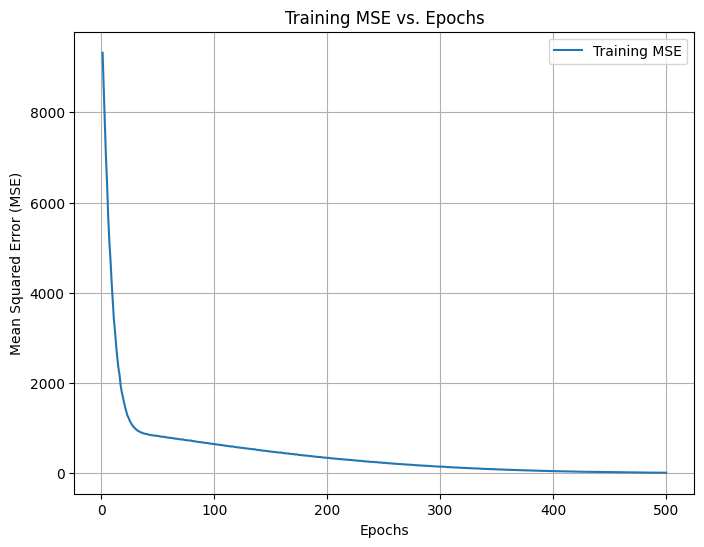

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Function to convert Celsius to Fahrenheit
def celsius_to_fahrenheit(c):
    return c * 9/5 + 32

# Function to create and train the model
def train_model(X, y, epochs=1000, learning_rate=0.01, batch_size=1):
    # Creating a simple neural network model using Keras
    model = Sequential()
    model.add(Dense(1, input_shape=(1,)))  # Single neuron for a simple linear model

    # Compiling the model with Mean Squared Error loss and Adam optimizer with learning rate
    opt = Adam(learning_rate=learning_rate)
    model.compile(optimizer=opt, loss='mean_squared_error')

    # Lists to store MSE and epoch values
    mse_values = []
    epoch_values = []

    # Training the model and storing MSE and epoch values for each epoch
    for epoch in range(epochs):
        history = model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0)
        mse = history.history['loss'][0]
        mse_values.append(mse)
        epoch_values.append(epoch + 1)

    # Plotting the graph of MSE vs. epochs
    plt.figure(figsize=(8, 6))
    plt.plot(epoch_values, mse_values, label='Training MSE')
    plt.title('Training MSE vs. Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.legend()
    plt.grid(True)
    plt.show()

    return model

# Generating 10 random Celsius temperatures
celsius_degrees = np.random.randint(-100, 100, 10)

# Converting Celsius temperatures to Fahrenheit
fahrenheit_degrees = [celsius_to_fahrenheit(c) for c in celsius_degrees]

# Creating the dataset
data = np.array(list(zip(celsius_degrees, fahrenheit_degrees)))

# Splitting features and labels
X = data[:, 0]  # Celsius temperatures
y = data[:, 1]  # Corresponding Fahrenheit temperatures

# Training the model and plotting the graph
_ = train_model(X, y, epochs=500, learning_rate=0.01, batch_size=1)
